In [2]:
import os
import tensorflow as tf
import cv2

In [3]:
category = os.listdir('dataset/train')
category

['pants', 'shirt', 'shorts', 't-shirt']

In [4]:
img = os.listdir('dataset/train/'+category[0])[0]
img

'01.jpg'

In [5]:
def preprocessing(dirpath):
    array = []
    for cat in category:
        path = os.path.join(dirpath, cat)
        for img in os.listdir(path):
            imgarray = cv2.imread(os.path.join(path, img))/255.
            imgarray = tf.image.resize(imgarray, (224, 224))
            array.append([imgarray, cat])
    return array

In [6]:
train = preprocessing('dataset/train')
test = preprocessing('dataset/test')

In [7]:
import random 
random.shuffle(train)
random.shuffle(test)

In [8]:
len(train)

160

In [9]:
X_train = []
y_train = []
for features, lables in train:
    X_train.append(features)
    y_train.append(lables)
    
X_test = []
y_test = []
for features, lables in test:
    X_test.append(features)
    y_test.append(lables)

In [10]:
len(X_train), len(X_test)

(160, 40)

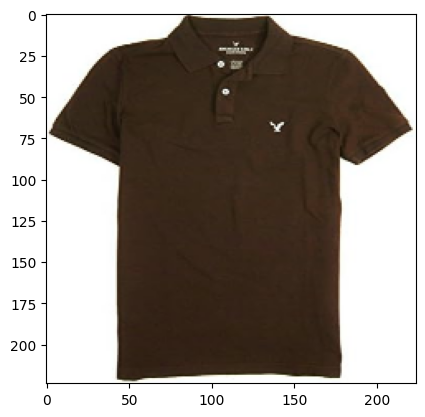

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [12]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [13]:
base_model.trainable = False

In [14]:
model = models.Sequential(
    [
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation = 'relu'),
        layers.Dense(4, activation='softmax')
    ]
)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [17]:
import numpy as np
X_train = np.array(X_train)
y_train = np.array(y_train)